In [38]:
# Python
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [39]:
plt.figure();

<Figure size 432x288 with 0 Axes>

In [40]:
# Python
df = pd.read_csv('DATA/AMC.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-18,19.180000,19.790001,18.900000,18.900000,13.593408,5457200
1,2013-12-19,18.900000,19.490000,18.809999,19.490000,14.017756,1605400
2,2013-12-20,19.650000,19.770000,19.400000,19.680000,14.154408,737100
3,2013-12-23,19.790001,19.990000,19.500000,19.740000,14.197564,698100
4,2013-12-24,19.740000,19.820000,19.500000,19.530001,14.046525,213700


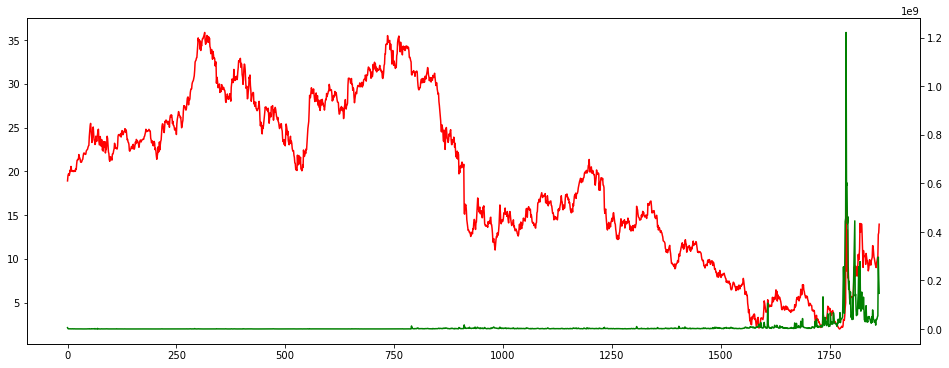

In [41]:
df.set_index('Date')
df.Close.plot(style='r', figsize=(16,6))
df.Volume.plot(secondary_y=True, style='g', figsize=(16,6));

In [82]:
start_date = "2020-01-01"
end_date = "2021-05-15"

after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]

In [83]:
filtered_dates

,Date,Open,High,Low,Close,Adj Close,Volume
1519,2020-01-02,7.30,7.56,7.23,7.46,7.414512,4545900
1520,2020-01-03,7.45,7.60,7.31,7.32,7.275366,2218000
1521,2020-01-06,7.25,7.30,7.11,7.12,7.076585,2903400
1522,2020-01-07,7.11,7.20,7.00,7.13,7.086524,3205300
1523,2020-01-08,7.11,7.15,6.61,6.62,6.579634,6557000
...,...,...,...,...,...,...,...
1859,2021-05-10,9.90,10.15,9.56,9.74,9.740000,41015300
1860,2021-05-11,9.93,10.48,9.60,10.05,10.050000,49601000
1861,2021-05-12,10.03,10.63,10.02,10.32,10.320000,54423500
1862,2021-05-13,10.88,14.20,10.64,12.77,12.770000,296525000


In [84]:
df_pred = filtered_dates[['Date', 'Close']]

In [85]:
df_pred.head()

,Date,Close
1519,2020-01-02,7.46
1520,2020-01-03,7.32
1521,2020-01-06,7.12
1522,2020-01-07,7.13
1523,2020-01-08,6.62


In [86]:
df_pred = df_pred.rename(columns={"Date": "ds", "Close": "y"})
df_pred['ds'] = pd.to_datetime(df_pred['ds'])

In [87]:
df_pred

,ds,y
1519,2020-01-02,7.46
1520,2020-01-03,7.32
1521,2020-01-06,7.12
1522,2020-01-07,7.13
1523,2020-01-08,6.62
...,...,...
1859,2021-05-10,9.74
1860,2021-05-11,10.05
1861,2021-05-12,10.32
1862,2021-05-13,12.77


In [99]:
# Python
m = Prophet(growth='linear',
            seasonality_mode = 'multiplicative',
            daily_seasonality=True,
            weekly_seasonality=True,
            yearly_seasonality=True)

m.fit(df_pred)

In [101]:
m

In [112]:
# Python
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
370,2021-06-09
371,2021-06-10
372,2021-06-11
373,2021-06-12
374,2021-06-13


In [113]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
361,2021-05-31,15.301167,13.786787,16.851155
362,2021-06-01,15.139563,13.574200,16.720523
363,2021-06-02,15.607801,14.122763,17.093802
364,2021-06-03,15.420886,13.955020,16.924735
365,2021-06-04,15.630013,14.223138,17.096508
366,2021-06-05,14.159637,12.719042,15.717925
367,2021-06-06,14.164079,12.550061,15.715458
368,2021-06-07,15.710061,14.209303,17.238478
369,2021-06-08,15.374329,13.845052,16.929340
370,2021-06-09,15.686243,14.081077,17.265172


In [114]:
forecast.round()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2020-01-02,2.0,4.0,7.0,2.0,2.0,4.0,4.0,4.0,2.0,...,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,6.0
1,2020-01-03,2.0,4.0,7.0,2.0,2.0,4.0,4.0,4.0,2.0,...,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,6.0
2,2020-01-06,2.0,4.0,7.0,2.0,2.0,4.0,4.0,4.0,2.0,...,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,6.0
3,2020-01-07,2.0,4.0,7.0,2.0,2.0,4.0,4.0,4.0,2.0,...,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,5.0
4,2020-01-08,2.0,4.0,7.0,2.0,2.0,4.0,4.0,4.0,2.0,...,0.0,0.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2021-06-09,2.0,14.0,17.0,2.0,2.0,4.0,4.0,4.0,6.0,...,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,16.0
371,2021-06-10,2.0,14.0,17.0,2.0,2.0,4.0,4.0,4.0,6.0,...,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,15.0
372,2021-06-11,2.0,14.0,17.0,2.0,2.0,4.0,4.0,4.0,6.0,...,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,15.0
373,2021-06-12,2.0,12.0,15.0,2.0,2.0,4.0,4.0,4.0,5.0,...,-0.0,-0.0,-0.0,2.0,2.0,2.0,0.0,0.0,0.0,14.0


In [118]:
forecast.to_csv('forecast_amc_price.csv')

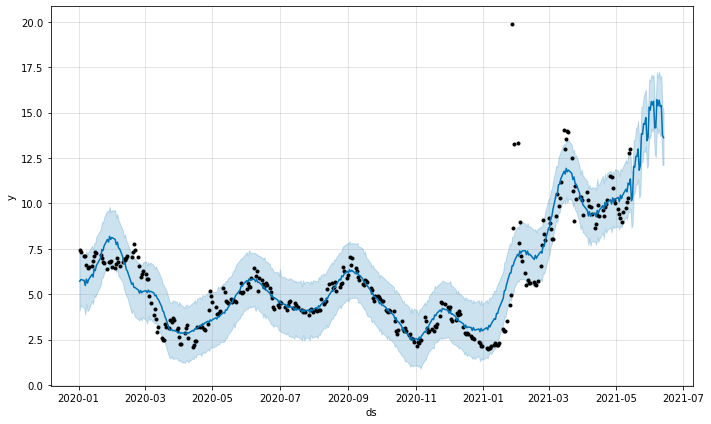

In [116]:
# Python
fig1 = m.plot(forecast)

C:\Users\ZP5922\.conda\envs\conda_env\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\ZP5922\.conda\envs\conda_env\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\Users\ZP5922\.conda\envs\conda_env\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


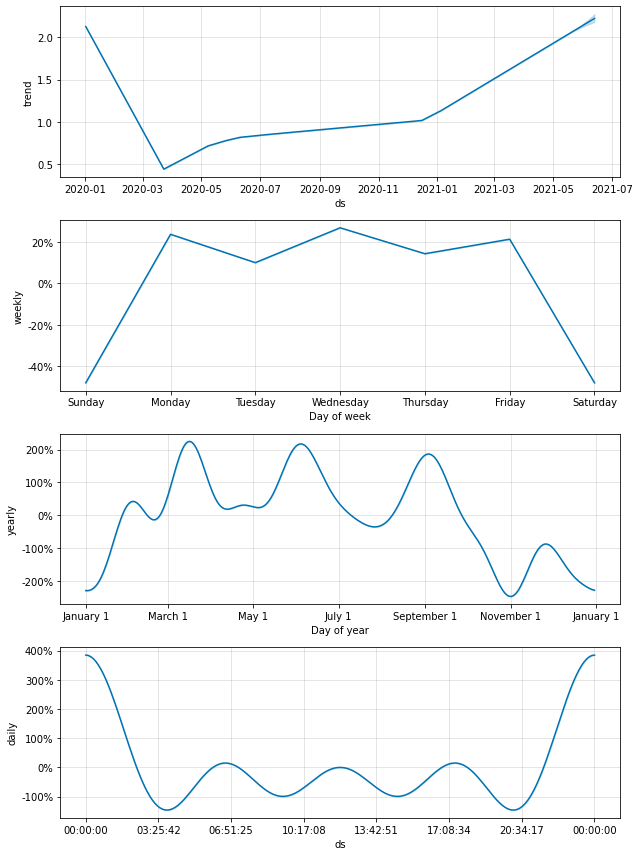

In [117]:
# Python
fig2 = m.plot_components(forecast)